<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_Adagrad%2C_RMSprop%2C_Adam_%EC%B5%9C%EC%A0%81%ED%99%94(optimize)_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):

    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0

    return results

'''
1. Adagrad, RMSprop, Adam 최적화 알고리즘을 적용할 하나의 모델을 자유롭게 생성합니다.
'''

def OPT_model(word_num):

    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape=(word_num,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

    return model

'''
2. 세 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. OPT_model 함수를 이용해 세 모델을 불러옵니다.
           모두 동일한 모델입니다.

   Step02. 세 모델의 손실 함수, 최적화 방법,
           평가 방법을 설정합니다.

   Step03. 세 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 세 모델을 각각 학습시킵니다.
           세 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.

   Step05. 세 모델을 테스트하고
           binary crossentropy 점수를 출력합니다.
           셋 중 어느 모델의 성능이 가장 좋은지 확인해보세요.
'''

def main():

    word_num = 100
    data_num = 25000

    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.

    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)

    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    adagrad_model = OPT_model(word_num)  # Adagrad를 사용할 모델입니다.
    rmsprop_model = OPT_model(word_num)  # RMSProp을 사용할 모델입니다.
    adam_model = OPT_model(word_num)     # Adam을 사용할 모델입니다.

    adagrad_opt = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=0.00001, decay=0.4)
    adagrad_model.compile(loss='binary_crossentropy', optimizer=adagrad_opt, metrics=['accuracy', 'binary_crossentropy'])

    rmsprop_opt = tf.keras.optimizers.RMSprop(lr=0.001)
    rmsprop_model.compile(loss='binary_crossentropy', optimizer=rmsprop_opt, metrics=['accuracy', 'binary_crossentropy'])

    adam_opt = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
    adam_model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy', 'binary_crossentropy'])

    adagrad_model.summary()
    rmsprop_model.summary()
    adam_model.summary()

    adagrad_history = adagrad_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    rmsprop_history = rmsprop_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    adam_history = adam_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores_adagrad = adagrad_model.evaluate(test_data, test_labels, verbose=0)
    scores_rmsprop = rmsprop_model.evaluate(test_data, test_labels, verbose=0)
    scores_adam = adam_model.evaluate(test_data, test_labels, verbose=0)

    print('\nscores_adagrad: ', scores_adagrad[-1])
    print('scores_rmsprop: ', scores_rmsprop[-1])
    print('scores_adam: ', scores_adam[-1])

    Visulaize([('Adagrad', adagrad_history),('RMSprop', rmsprop_history),('Adam', adam_history)])

    return adagrad_history, rmsprop_history, adam_history

if __name__ == "__main__":
    main()

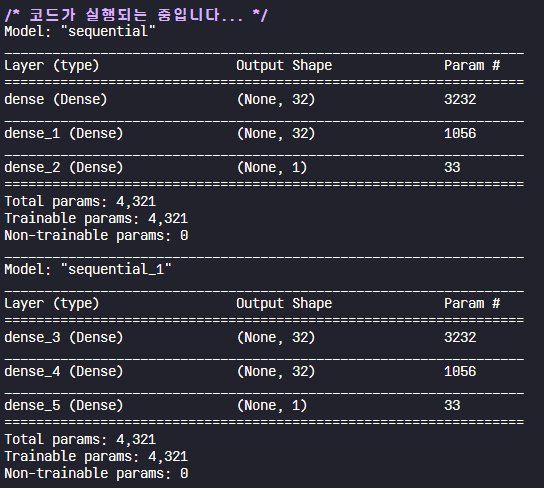

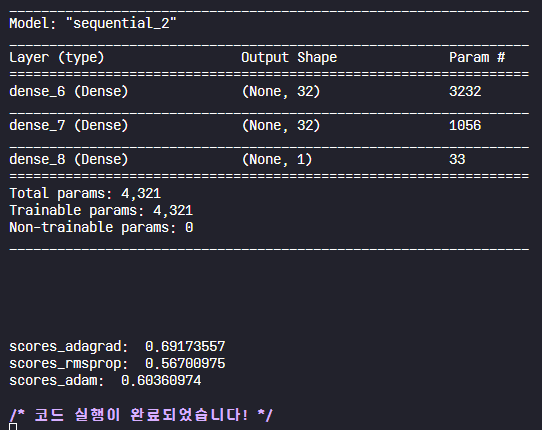

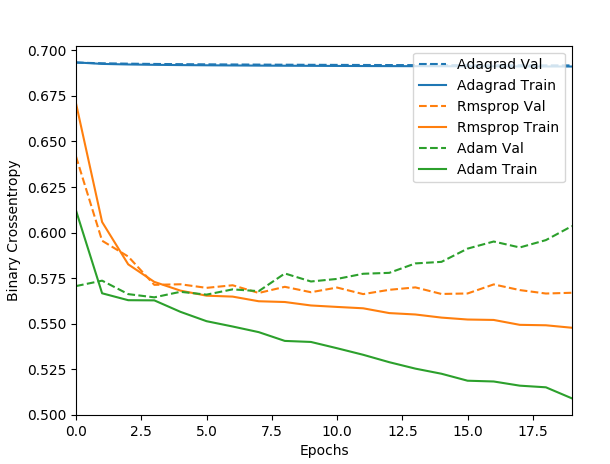